## Working with custome image

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import imread

In [2]:
data_dir = r'C:\Users\Data\data tensorflow\archive\cell_malaria_datasets'

In [3]:
os.listdir(data_dir)

['Test', 'Train']

In [4]:
train_path = data_dir+'\\Train'

In [5]:
test_path = data_dir+'\\Test'

In [6]:
os.listdir(train_path)

['Parasite', 'Uninfected']

In [7]:
os.listdir(test_path)

['Parasite', 'Uninfected']

## Visual the image

In [8]:
 os.listdir(train_path+'\\Parasite\\')[2]

'C133P94ThinF_IMG_20151004_155721_cell_113.png'

In [9]:
parasite_cell = train_path+'\\Parasite\\'+'C133P94ThinF_IMG_20151004_155721_cell_113.png'

In [10]:
parasite_image = imread(parasite_cell)

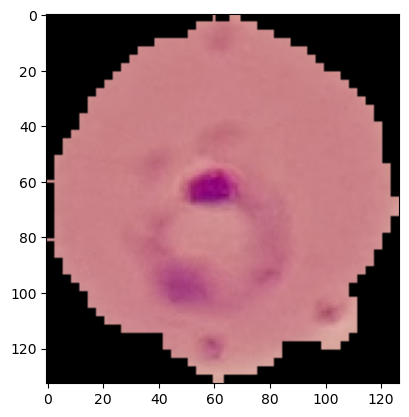

In [11]:
plt.imshow(parasite_image)

In [12]:
parasite_image.shape

(133, 127, 3)

In [13]:
os.listdir(train_path+'\\Uninfected')[3]

'C1_thinF_IMG_20150604_104722_cell_15.png'

In [14]:
uninfected_cell = train_path+'\\Uninfected\\'+'C1_thinF_IMG_20150604_104722_cell_15.png'

In [15]:
uninfected_image = imread(uninfected_cell)

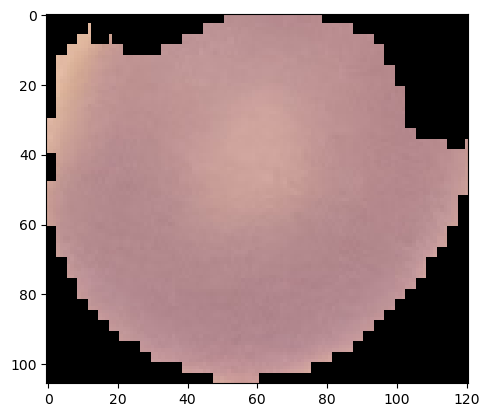

In [16]:
plt.imshow(uninfected_image)

In [17]:
uninfected_image.shape

(106, 121, 3)

## how many image there are

In [18]:
len(os.listdir(train_path+'\\Parasite'))

220

In [19]:
len(os.listdir(train_path+'\\Uninfected'))

196

## Calculate average dimentions of these images

In [20]:
dim1 = []
dim2 = []

for file_image in os.listdir(test_path+'\\Uninfected'):
    image = imread(test_path+'\\Uninfected\\'+''+file_image)
    d1, d2, color = image.shape
    
    dim1.append(d1)
    dim2.append(d2)

In [21]:
dim1

[130,
 130,
 112,
 136,
 115,
 121,
 127,
 124,
 124,
 130,
 121,
 133,
 97,
 127,
 112,
 154,
 130,
 145,
 100,
 103,
 106,
 136,
 115,
 121,
 112,
 112,
 127,
 106,
 130,
 115,
 121,
 100,
 124,
 124,
 106,
 115,
 109,
 112,
 142,
 100,
 130,
 115,
 118]

C:\Users\ibrahim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


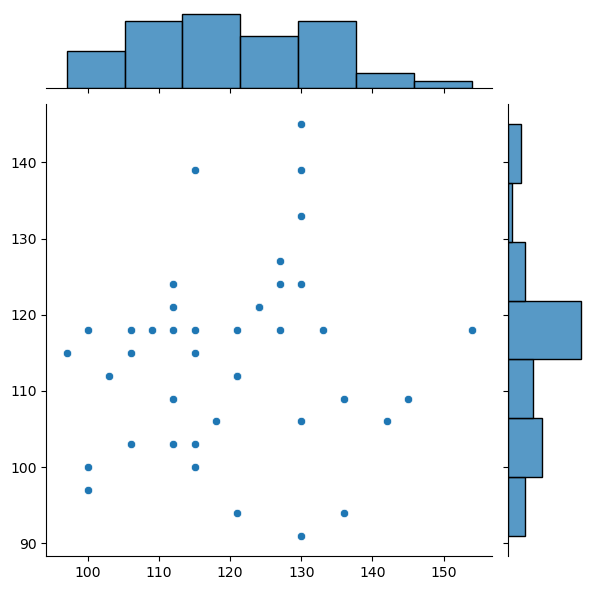

In [22]:
sns.jointplot(dim1, dim2);

In [23]:
np.mean(dim1)

120.16279069767442

In [24]:
np.mean(dim2)

114.72093023255815

In [25]:
image_shape = (114,114, 3)

## Image Manipulation

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.src.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |  Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
 |  recommended for new code. Prefer loading images with
 |  `tf.keras.utils.image_dataset_from_directory` and transforming the output
 |  `tf.data.Dataset` with preprocessing layers. For more infor

In [28]:
image_gen = ImageDataGenerator(rotation_range = 20, 
                               height_shift_range = 0.10, 
                               width_shift_range = 0.10, 
                               shear_range = 0.1, 
                               zoom_range = 0.1,
                               rescale = 1/255,
                               horizontal_flip = True, 
                               fill_mode = 'nearest'                              
                              )

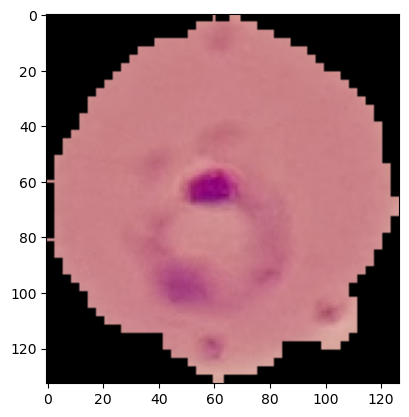

In [29]:
# image original

plt.imshow(parasite_image)

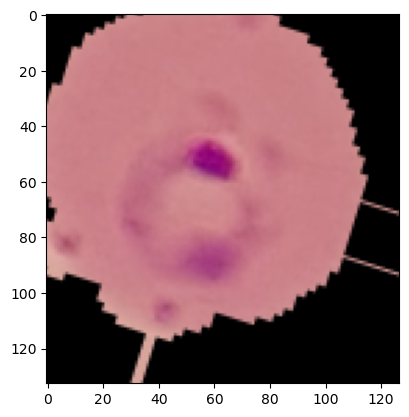

In [30]:
# after manipulation

plt.imshow(image_gen.random_transform(parasite_image))

## Generate many manipuated image form a directory

In [31]:
image_gen.flow_from_directory(train_path)

Found 416 images belonging to 2 classes.


In [32]:
image_gen.flow_from_directory(test_path)

Found 134 images belonging to 2 classes.


## Create The Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [34]:
model = Sequential()

model.add(Conv2D(filters= 32, kernel_size= (3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters= 128, kernel_size= (3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 128, kernel_size= (3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer= 'adam', 
              metrics = ['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 56, 56, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 54, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 27, 27, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 128)       0

In [36]:
## earyStopping

from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor= 'val_loss', patience =3, verbose =1)

## Train The Model

In [38]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras.src.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest', keep_aspect_ratio=False) method of keras.src.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    Args:
        directory: string, path to the target directory. It should contain
          one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images
          inside each of the subdirectories directory tree will be included
          in the generator. See [this script](
          https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
          for more details.
        target_size: Tuple of integers `(height, width)`, defaults to `(256,
          256)`. The di

In [39]:
batch_size = 16

In [40]:
train_image_gen = image_gen.flow_from_directory(train_path, 
                                            target_size = image_shape[:2], 
                                            color_mode ='rgb', 
                                            batch_size = batch_size, 
                                            class_mode = 'binary'                                           
                                            )

Found 416 images belonging to 2 classes.


In [41]:
test_image_gen = image_gen.flow_from_directory(test_path, 
                                           target_size = image_shape[:2], 
                                           color_mode = 'rgb', 
                                           batch_size = batch_size, 
                                           class_mode ='binary', 
                                           shuffle  = False)

Found 134 images belonging to 2 classes.


In [42]:
train_image_gen.class_indices

{'Parasite': 0, 'Uninfected': 1}

In [43]:
test_image_gen.class_indices

{'Parasite': 0, 'Uninfected': 1}

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
result = model.fit_generator(train_image_gen, 
                             epochs = 15, 
                             validation_data = test_image_gen, 
                             callbacks =[early_stop])

Epoch 1/15
26/26 [==============================] - 104s 3s/step - loss: 0.7043 - accuracy: 0.5024 - val_loss: 0.6731 - val_accuracy: 0.6791
Epoch 2/15
26/26 [==============================] - 70s 3s/step - loss: 0.6896 - accuracy: 0.5529 - val_loss: 0.6746 - val_accuracy: 0.6791
Epoch 3/15
26/26 [==============================] - 69s 3s/step - loss: 0.5140 - accuracy: 0.7356 - val_loss: 0.6079 - val_accuracy: 0.6567
Epoch 4/15
26/26 [==============================] - 70s 3s/step - loss: 0.3573 - accuracy: 0.8606 - val_loss: 0.5365 - val_accuracy: 0.6567
Epoch 5/15
26/26 [==============================] - 130s 5s/step - loss: 0.3265 - accuracy: 0.8798 - val_loss: 0.4253 - val_accuracy: 0.7836
Epoch 6/15
26/26 [==============================] - 73s 3s/step - loss: 0.3163 - accuracy: 0.8966 - val_loss: 0.4578 - val_accuracy: 0.7388
Epoch 7/15
26/26 [==============================] - 68s 3s/step - loss: 0.2618 - accuracy: 0.9183 - val_loss: 0.5740 - val_accuracy: 0.7015
Epoch 8/15
26/26 [

In [46]:
# save model
from tensorflow.keras.models import load_model
model.save('malaria_ditector.h5')

## Model Evaluation

In [47]:
losses = pd.DataFrame(model.history.history)

In [48]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.704285,0.502404,0.673112,0.679105
1,0.689632,0.552885,0.674577,0.679105
2,0.514022,0.735577,0.607868,0.656716
3,0.357250,0.860577,0.536479,0.656716
4,0.326514,0.879808,0.425266,0.783582
5,0.316291,0.896635,0.457751,0.738806
6,0.261801,0.918269,0.574037,0.701493
7,0.239061,0.920673,0.313354,0.873134
8,0.203545,0.939904,0.311021,0.873134
9,0.205964,0.932692,0.394588,0.813433


In [49]:
plt.style.use(['science','notebook','grid'])

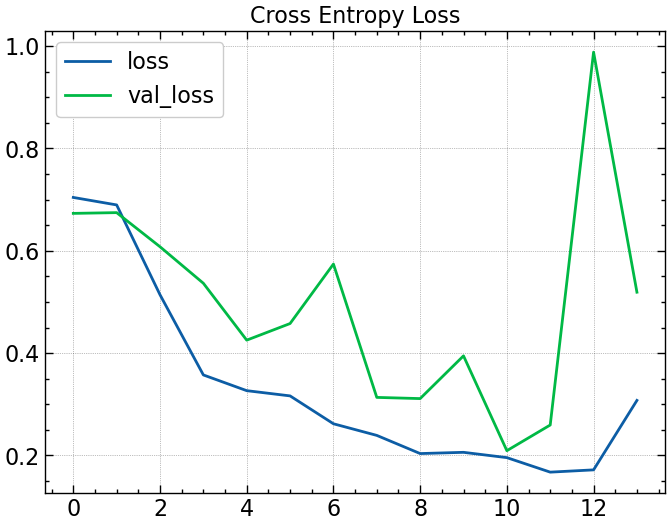

In [50]:
losses[['loss','val_loss']].plot()
plt.title('Cross Entropy Loss');

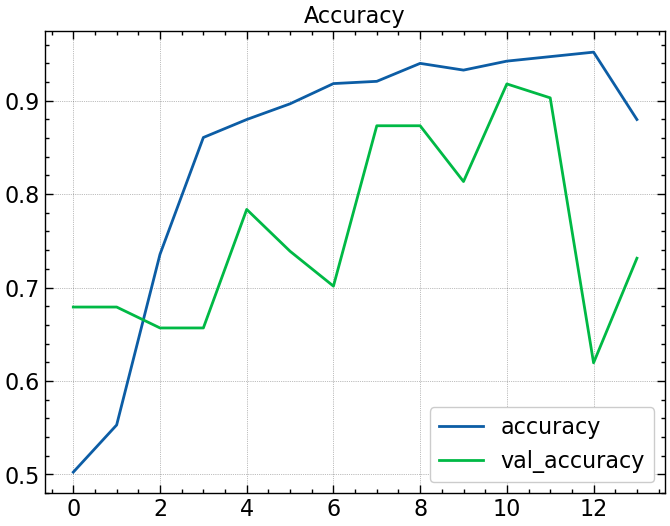

In [51]:
losses[['accuracy','val_accuracy']].plot()
plt.title('Accuracy');

In [52]:
model.evaluate(test_image_gen)

9/9 [==============================] - 15s 419ms/step - loss: 0.5090 - accuracy: 0.7313


[0.5089536905288696, 0.7313432693481445]

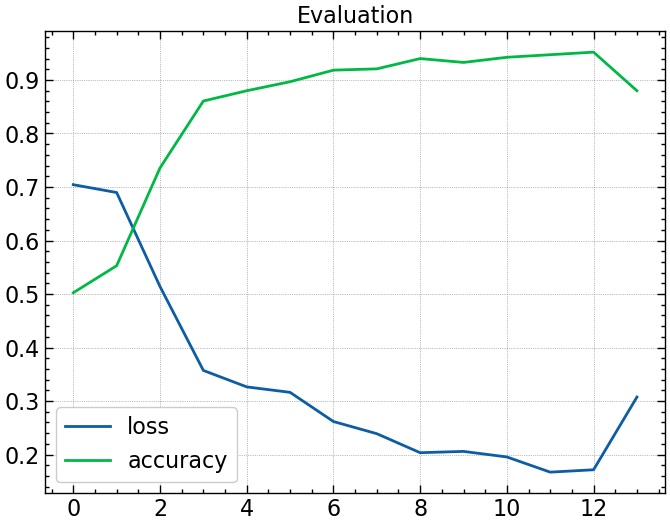

In [53]:
losses[['loss','accuracy']].plot()
plt.title('Evaluation');

In [54]:
pred_probabiliti = model.predict(test_image_gen)

9/9 [==============================] - 15s 408ms/step


In [55]:
pred_probabiliti

array([[2.5421480e-06],
       [7.4573016e-01],
       [7.5550961e-01],
       [6.9449482e-07],
       [3.4280353e-22],
       [7.7936882e-01],
       [6.1478145e-06],
       [2.4288406e-07],
       [7.1690500e-01],
       [8.3018517e-01],
       [6.9771653e-07],
       [3.7812551e-06],
       [8.1546766e-01],
       [8.5579163e-01],
       [2.4629803e-06],
       [7.8763270e-01],
       [8.3218282e-01],
       [8.0516100e-01],
       [5.7672016e-02],
       [7.5504601e-01],
       [2.2511221e-04],
       [1.1118957e-02],
       [8.6168998e-01],
       [7.8955382e-01],
       [8.3571446e-01],
       [7.5448537e-05],
       [8.5340393e-01],
       [2.2198741e-01],
       [4.8311106e-03],
       [2.7887739e-02],
       [2.5229234e-02],
       [1.2454595e-09],
       [5.3242095e-11],
       [8.2168603e-01],
       [7.1160102e-01],
       [8.4412289e-01],
       [8.7108397e-01],
       [7.0858890e-01],
       [8.5653859e-01],
       [8.2900637e-01],
       [8.3588153e-01],
       [6.055374

In [56]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [57]:
prediction = pred_probabiliti >0.5

In [58]:
prediction

array([[False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

## Evaluation Metrics

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [60]:
print(classification_report(test_image_gen.classes, prediction))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        91
           1       0.54      1.00      0.70        43

    accuracy                           0.73       134
   macro avg       0.77      0.80      0.73       134
weighted avg       0.85      0.73      0.74       134



In [61]:
confusion_matrix(test_image_gen.classes, prediction)

array([[55, 36],
       [ 0, 43]], dtype=int64)

<AxesSubplot:>

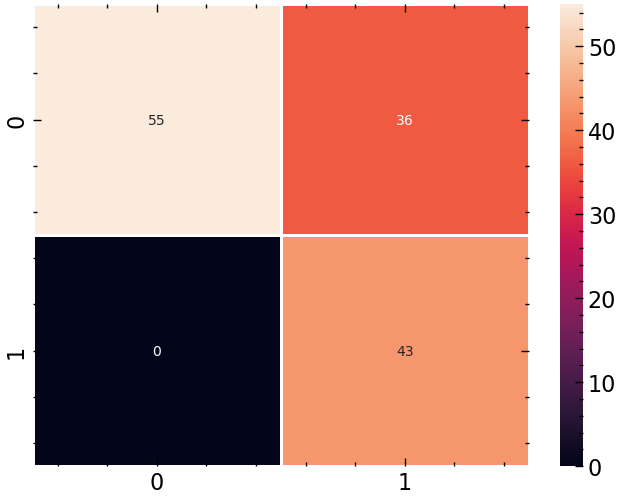

In [62]:
sns.heatmap(confusion_matrix(test_image_gen.classes, prediction), annot=True, lw =1)

## Prdictio on image

In [63]:
uninfected_cell

'C:\\Users\\Data\\data tensorflow\\archive\\cell_malaria_datasets\\Train\\Uninfected\\C1_thinF_IMG_20150604_104722_cell_15.png'

In [64]:
from tensorflow.keras.preprocessing import image

In [65]:
my_image = image.load_img(uninfected_cell, target_size = image_shape)

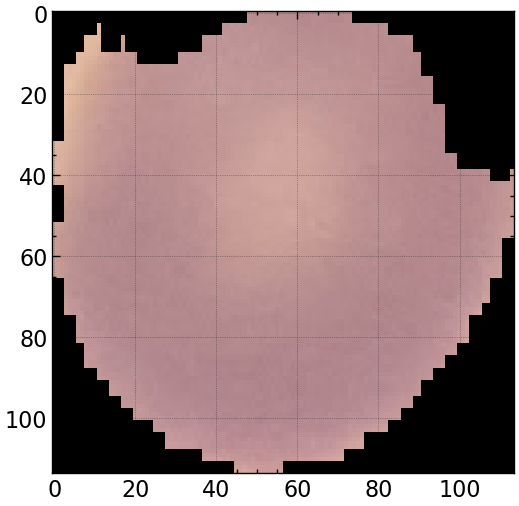

In [66]:
plt.imshow(my_image)

In [67]:
type(my_image)

PIL.Image.Image

## Convert to Array

In [68]:
my_image = image.img_to_array(my_image)

In [69]:
type(my_image)

numpy.ndarray

In [70]:
my_image.shape

(114, 114, 3)

## Change shape Dimetion

In [71]:
my_image = np.expand_dims(my_image, axis =0)

In [72]:
my_image.shape

(1, 114, 114, 3)

## Make Prediction

In [73]:
model.predict(my_image)

1/1 [==============================] - 1s 1s/step


array([[1.]], dtype=float32)

In [74]:
train_image_gen.class_indices

{'Parasite': 0, 'Uninfected': 1}

In [75]:
test_image_gen.class_indices

{'Parasite': 0, 'Uninfected': 1}